# REGRESSION Mini-Project-1

## Project Brief Regression – Prediction of Store Sales

### Store Sales Prediction

The success of any retail store depends upon its sales. More the sales made, more is the revenue. With a good customer service and care, the customer too enjoys a good shopping experience. This will lead to more in-flow of customers, opening more store branches across a city / country.

To enable this, store owners rely heavily on past data to predict future sales. This will help them in strategizing their business models and come up with innovative techniques and ideas to attract customers and set realistic goals.

Many medium to large stores implement this kind of analytics to understand trends like which products are getting sold faster, what are the slow moving products, impact of store types, etc. With new branches of the store, the analysis can get more complex and may also involve stiff competition from other competitors.


### Business Objective

● Build a model to predict the Sales of a store


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split,cross_validate,KFold,RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve 
from sklearn import tree
from numpy import mean
from numpy import std
from sklearn.ensemble import AdaBoostRegressor
from sklearn.impute import KNNImputer

In [2]:
sales_df=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [3]:
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [6]:
df=sales_df.copy()

In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
df=df.drop(columns=['Item_Identifier','Outlet_Identifier'], axis=1)

In [9]:
cols = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']

df[cols] = df[cols].apply(lambda x: x. astype('category'))

df.dtypes

Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Establishment_Year       int64
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

In [10]:
label_encoder = preprocessing.LabelEncoder()
df[cols] = df[cols].apply(label_encoder.fit_transform)

df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.074402,6,182.0950,1998,1,2,0,732.3800
4,8.93,0,0.064299,9,53.8614,1987,0,2,1,994.7052


In [11]:
missing=KNNImputer(n_neighbors=5)

In [12]:
missing=KNNImputer( n_neighbors=3)
impute= missing.fit_transform(df)

In [13]:
impute=pd.DataFrame(impute)
impute.columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales']
impute.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
corr= impute.corr()
corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.000247,0.000944,-0.001719,0.001913,0.019884
Item_Fat_Content,-0.033737,1.000000,0.048315,-0.147733,-0.004019,0.000137,-0.000827,0.001373,-0.000228,0.010276
Item_Visibility,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.090833,0.026808,-0.020550,-0.172744,-0.116989
Item_Type,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.003061,-0.001080,0.002083,0.004305,0.027845
Item_MRP,0.035751,-0.004019,-0.009144,0.043948,1.000000,0.000141,-0.001305,0.000838,0.000136,0.621313
Outlet_Establishment_Year,0.000247,0.000137,-0.090833,0.003061,0.000141,1.000000,0.428387,-0.089328,-0.122519,-0.062577
Outlet_Size,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.428387,1.000000,-0.590677,-0.260496,-0.070268
Outlet_Location_Type,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.089328,-0.590677,1.000000,0.467251,0.117214
Outlet_Type,0.001913,-0.000228,-0.172744,0.004305,0.000136,-0.122519,-0.260496,0.467251,1.000000,0.373245
Item_Outlet_Sales,0.019884,0.010276,-0.116989,0.027845,0.621313,-0.062577,-0.070268,0.117214,0.373245,1.000000


## VISUALIZATION

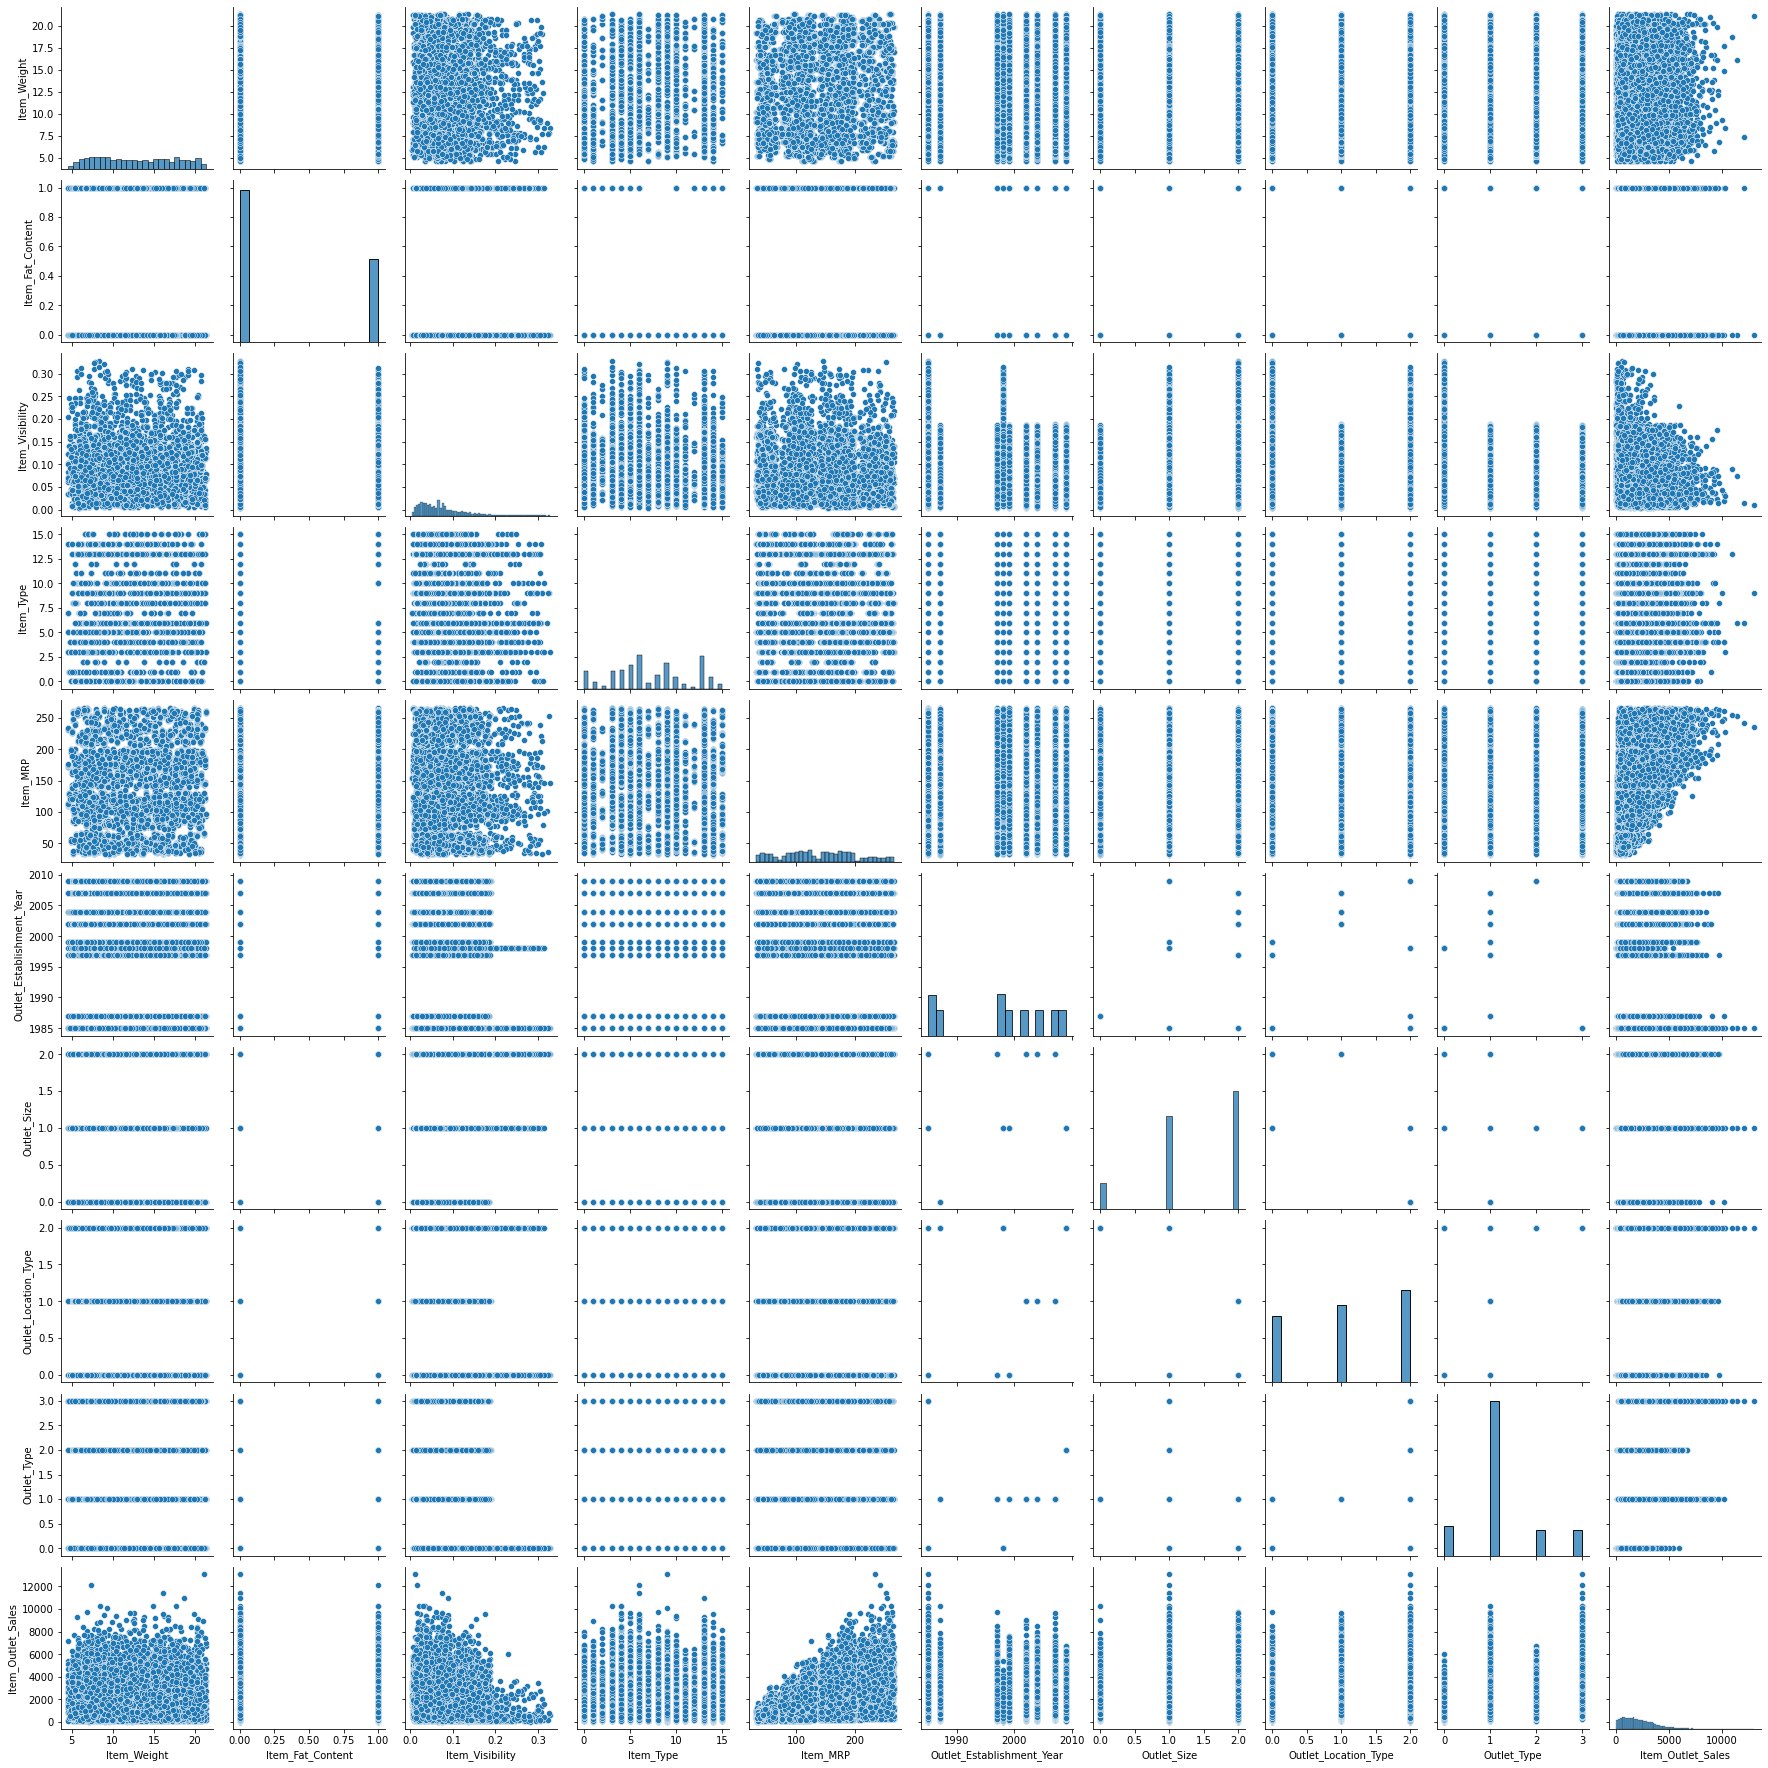

In [15]:
sb.pairplot(impute)

<AxesSubplot:>

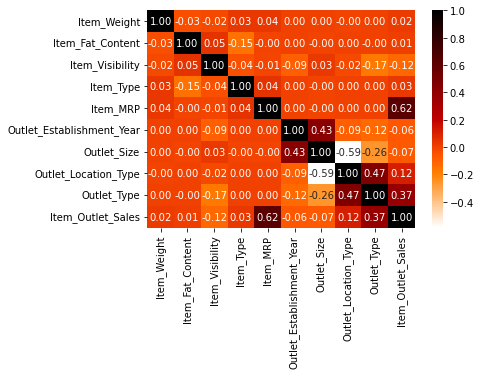

In [16]:
sb.heatmap(corr,annot=True,fmt='.2f',cbar=True,cmap='gist_heat_r')

Sales is Highly Co-related with Item MRP and Outlet_type

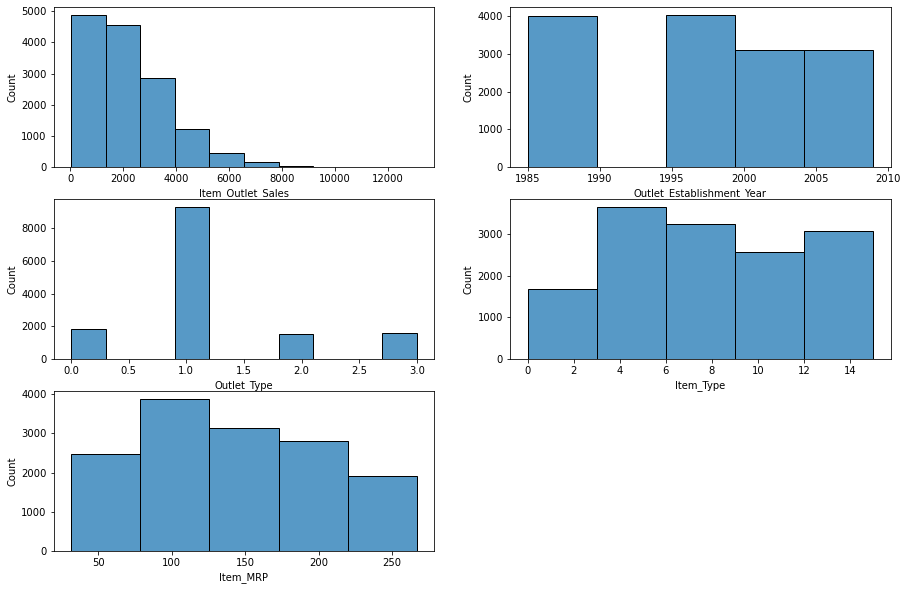

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(321)

sb.histplot(impute["Item_Outlet_Sales"],bins=10)

plt.subplot(322)

sb.histplot(impute['Outlet_Establishment_Year'],bins=5)

plt.subplot(323)

sb.histplot(impute['Outlet_Type'],bins=10)

plt.subplot(324)

sb.histplot(impute['Item_Type'],bins=5)

plt.subplot(325)

sb.histplot(impute['Item_MRP'],bins=5)

plt.show()

#### NONE OF THEM ARE NORMALLY DISTRIBUTED

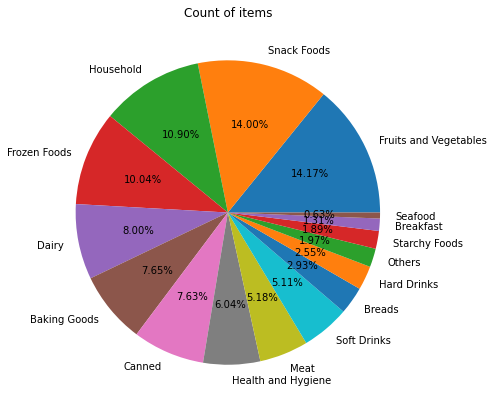

In [18]:
fig= plt.subplots( figsize = (15, 7))
plt.title("Count of items")                        
percentage = sales_df["Item_Type"].value_counts()         
labels = list(sales_df["Item_Type"].value_counts().index) 
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

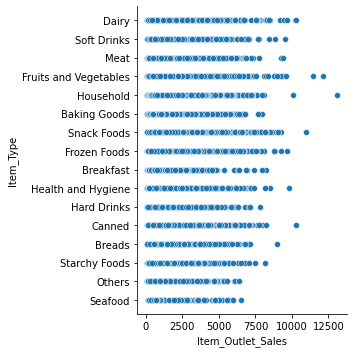

In [19]:
sb.relplot(impute["Item_Outlet_Sales"],sales_df["Item_Type"])

#### DAIRY AND FRUITS VEGETABLE HAS HIGHEST SALES

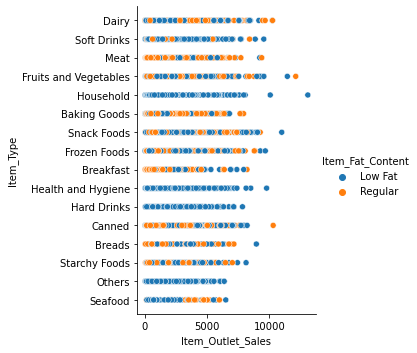

In [20]:
sb.relplot(impute["Item_Outlet_Sales"],sales_df["Item_Type"],sales_df['Item_Fat_Content'])

#### HIGH AMOUNT OF LOW FAT IS SOLD

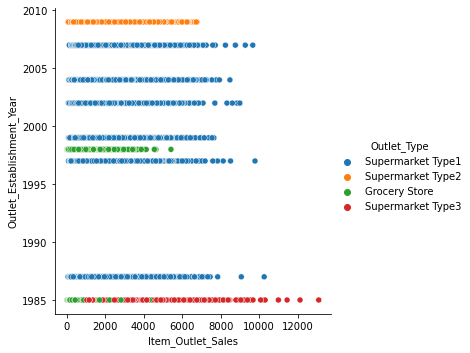

In [21]:
sb.relplot(impute["Item_Outlet_Sales"],sales_df["Outlet_Establishment_Year"],sales_df['Outlet_Type'])

#### SUPERMARKET TYPE1 IS SHOWING HIGH SALES EVERY YEAR

## MODELS

In [22]:
att=impute.copy()

In [23]:
#att=att[['Item_Type','Outlet_Type','Item_Outlet_Sales']]

In [24]:
#att.head()

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [26]:
def get_stacking():

    level0 = list()
    #level0.append(('lr', LinearRegression()))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
    #level0.append(('rf', RandomForestRegressor()))
    
    level1 = LinearRegression()
    
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=4)
    return model

In [27]:
X = np.array(att.drop(columns='Item_Outlet_Sales', axis =1))
y= np.array(att['Item_Outlet_Sales'])
skf = KFold(n_splits=3, shuffle=False, random_state=None)
scores=['r2','neg_mean_squared_error','neg_root_mean_squared_error']

model1 = LinearRegression()
model2 = DecisionTreeRegressor(max_depth=5)
model3 = RandomForestRegressor()
model5 = AdaBoostRegressor()
model4 = get_stacking()


n_scores1 = cross_validate(model1, X, y, scoring=scores, cv=skf, n_jobs=-1, error_score='raise')
n_scores2 = cross_validate(model2, X, y, scoring=scores, cv=skf, n_jobs=-1, error_score='raise')
n_scores3 = cross_validate(model3, X, y, scoring=scores, cv=skf, n_jobs=-1, error_score='raise')
n_scores5 = cross_validate(model5, X, y, scoring=scores, cv=skf, n_jobs=-1, error_score='raise')
n_scores4 = cross_validate(model4, X, y, scoring=scores, cv=skf, n_jobs=-1, error_score='raise')

# report performance
#print(n_scores)
perf1=mean(n_scores1['test_r2'])
perf2=mean(n_scores2['test_r2'])
perf3=mean(n_scores3['test_r2'])
perf5=mean(n_scores5['test_r2'])
perf4=mean(n_scores4['test_r2'])

mse1=mean(n_scores1['test_neg_mean_squared_error'])
mse2=mean(n_scores2['test_neg_mean_squared_error'])
mse3=mean(n_scores3['test_neg_mean_squared_error'])
mse5=mean(n_scores5['test_neg_mean_squared_error'])
mse4=mean(n_scores4['test_neg_mean_squared_error'])

rmse1=mean(n_scores1['test_neg_root_mean_squared_error'])
rmse2=mean(n_scores2['test_neg_root_mean_squared_error'])
rmse3=mean(n_scores3['test_neg_root_mean_squared_error'])
rmse5=mean(n_scores5['test_neg_root_mean_squared_error'])
rmse4=mean(n_scores4['test_neg_root_mean_squared_error'])


In [28]:
comparison = pd.DataFrame({'Perf':[perf1,perf2,perf3,perf5,perf4], 'MSE':[mse1,mse2,mse3,mse5,mse4], 'RMSE':[rmse1,rmse2,rmse3,rmse5,rmse4]}, index = ['LINEAR','DECISIONTREE','RANDOM FOREST','BOOSTING','STACKING'])
comparison.sort_values(by=['MSE','RMSE'])

,Perf,MSE,RMSE
LINEAR,0.528569,-1.179369e+06,-1073.391269
BOOSTING,0.532823,-1.168194e+06,-1068.448009
STACKING,0.614928,-1.008971e+06,-968.607027
DECISIONTREE,0.593159,-1.004869e+06,-994.773458
RANDOM FOREST,0.603104,-9.856555e+05,-983.656300


In [29]:
y_pred4 = cross_val_predict(model4, X, y, cv=skf)

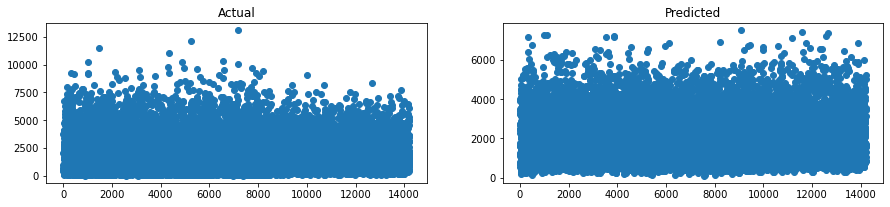

In [30]:
o=np.arange(0,len(y_pred4))
plt.figure(figsize=(15,10))

plt.subplot(321)

plt.scatter(o, y)
plt.title('Actual')
plt.subplot(322)

plt.scatter(o, y_pred4)
plt.title('Predicted')
plt.show()

#### There is increase in Sales as per Actual

In [31]:
F_pred= pd.DataFrame()
F_pred['Actual']=y
F_pred['Future_Pred']=y_pred4
F_pred

,Actual,Future_Pred
0,3735.138000,2717.536153
1,443.422800,737.755682
2,2097.270000,2268.258594
3,732.380000,2489.564822
4,994.705200,1204.275663
...,...,...
14199,860.213600,1622.832259
14200,3069.559933,3546.738865
14201,1252.591733,1563.549774
14202,3662.121933,3445.378533


In [32]:
att=sales_df

In [33]:
att=pd.concat([att,F_pred],axis=1)
att

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Actual,Future_Pred
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,3735.138000,2717.536153
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,443.422800,737.755682
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2097.270000,2268.258594
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,732.380000,2489.564822
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,994.705200,1204.275663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,860.213600,1622.832259
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,3069.559933,3546.738865
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,1252.591733,1563.549774
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,3662.121933,3445.378533


In [34]:
#data= att.groupby(['Outlet_Type','Item_Type'])['Actual']

In [35]:
att.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Actual', 'Future_Pred'],
      dtype='object')

In [36]:
data=pd.DataFrame({'Actual_sales' : att.groupby(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Future_Pred'])['Actual'].sum()}).reset_index()
data=data[data['Future_Pred']>data['Actual_sales']]
data=data.sort_values(by=['Future_Pred'],ascending=False)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Future_Pred,Actual_sales
6743,FDP16,18.600,Low Fat,0.039105,Frozen Foods,245.3802,OUT027,Medium,Tier 3,Supermarket Type3,7528.554679,6640.689200
13884,NCW30,5.210,Low Fat,0.010957,Household,259.9962,OUT027,Medium,Tier 3,Supermarket Type3,7430.796746,5162.391267
1855,FDB21,7.475,Low Fat,0.074402,Fruits and Vegetables,242.9854,OUT027,Medium,Tier 3,Supermarket Type3,7285.620842,6767.191200
7386,FDQ52,17.000,Low Fat,0.118807,Frozen Foods,248.8434,OUT027,Medium,Tier 3,Supermarket Type3,7230.076560,6705.271800
6045,FDN22,18.850,Regular,0.074402,Snack Foods,252.6724,OUT027,Medium,Tier 3,Supermarket Type3,7226.787992,6600.741200
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,FDS40,15.350,Low Fat,0.023466,Frozen Foods,35.2190,OUT010,Medium,Tier 3,Grocery Store,184.465941,36.619000
4077,FDH28,15.850,Regular,0.192650,Frozen Foods,37.4506,OUT019,Small,Tier 1,Grocery Store,148.601208,37.950600
11271,FDZ27,7.935,Low Fat,0.082291,Dairy,51.2350,OUT019,Small,Tier 1,Grocery Store,134.915326,49.935000
3190,FDE51,5.925,Regular,0.168902,Dairy,43.4086,OUT019,Small,Tier 1,Grocery Store,121.483062,44.608600


In [37]:
data=pd.DataFrame({'Actual_sales' : att.groupby(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
        'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type','Future_Pred'])['Actual'].sum()}).reset_index()
#data=data[data['Future_Pred']>data['Actual_sales']]
data=data.sort_values(by=['Actual_sales'],ascending=False)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Future_Pred,Actual_sales
11937,NCE42,21.100,Low Fat,0.010551,Household,234.9958,OUT027,Medium,Tier 3,Supermarket Type3,5013.082573,13086.9648
7157,FDQ19,7.350,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,Medium,Tier 3,Supermarket Type3,4883.032186,12117.5600
11215,FDZ20,16.100,Low Fat,0.074402,Fruits and Vegetables,253.0356,OUT027,Medium,Tier 3,Supermarket Type3,5988.312673,11445.1020
6862,FDP33,18.700,Low Fat,0.088840,Snack Foods,254.2672,OUT027,Medium,Tier 3,Supermarket Type3,4650.875367,10993.6896
4537,FDI50,8.420,Regular,0.030693,Canned,228.0352,OUT027,Medium,Tier 3,Supermarket Type3,5512.293571,10306.5840
...,...,...,...,...,...,...,...,...,...,...,...,...
7357,FDQ47,7.155,Regular,0.281510,Breads,33.8874,OUT010,Medium,Tier 3,Grocery Store,566.536361,35.2874
12624,NCL41,12.350,Low Fat,0.073077,Health and Hygiene,34.3216,OUT019,Small,Tier 1,Grocery Store,449.788146,34.6216
8954,FDU21,11.800,Regular,0.134328,Snack Foods,35.0558,OUT019,Small,Tier 1,Grocery Store,487.480107,33.9558
13439,NCR42,9.105,Low Fat,0.064411,Household,33.3900,OUT010,Medium,Tier 3,Grocery Store,473.223739,33.2900


Conclusion:(Errors neglected)
1. Actual sales for Household, Fruits and Vegetables is High for Supermarket Type3 with Item ID NCE42 and FDQ19 also with medium outlet size and Tier 3 location type.
2. Predicted sales is high for Frozen Foods and Household for Supermarket Type3 with Item ID FDP16 and NCW30 also with medium outlet size and Tier 3 location type.